In [1]:
%matplotlib notebook
%load_ext autoreload
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [2]:
%time
import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

sys.path.append('..')
import project

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 3.34 μs


In [3]:
# configuration settings
data_root = '../data/Emory-4DCT'
mask_roi = 'lung_combined_mask'
mesh_radius = 20
num_levels = 3
conv_channels = 4
conv_kernel_size = 3
num_conv_layers = 2
batch_size = 4
learning_rate = 1e-5

In [4]:
train_images = project.imaging.Emory4DCT(data_root, phases=range(10, 100, 10))
test_images = project.imaging.Emory4DCT(data_root, phases=[0])
train_images

Emory4DCT('../data/Emory-4DCT', 10 cases)

In [5]:
train_examples = train_images.get_examples(mask_roi, mesh_radius)
test_examples = test_images.get_examples(mask_roi, mesh_radius)
len(train_examples), len(test_examples)

(90, 10)

In [6]:
train_data = project.data.Dataset(train_examples)
test_data = project.data.Dataset(test_examples)

In [7]:
model = project.model.UNet3D(
    in_channels=1,
    out_channels=1,
    num_levels=num_levels,
    num_conv_layers=num_conv_layers,
    conv_channels=conv_channels,
    conv_kernel_size=conv_kernel_size,
).cuda()

In [14]:
%autoreload
trainer = project.training.Trainer(
    model,
    train_data,
    test_data,
    batch_size,
    learning_rate,
    save_every=1,
    save_prefix='nb_2024-09-26_2',
    sync_cuda=True
)

Loading ../data/Emory-4DCT/Case3Pack/NIFTI/case3_T00.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/CorrField/case3_T10_T00.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/pygalmesh/case3_T00_20.xdmf... 535
['case3_T00.nii'].

/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1724789115564/work/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<IPython.core.display.Javascript object>


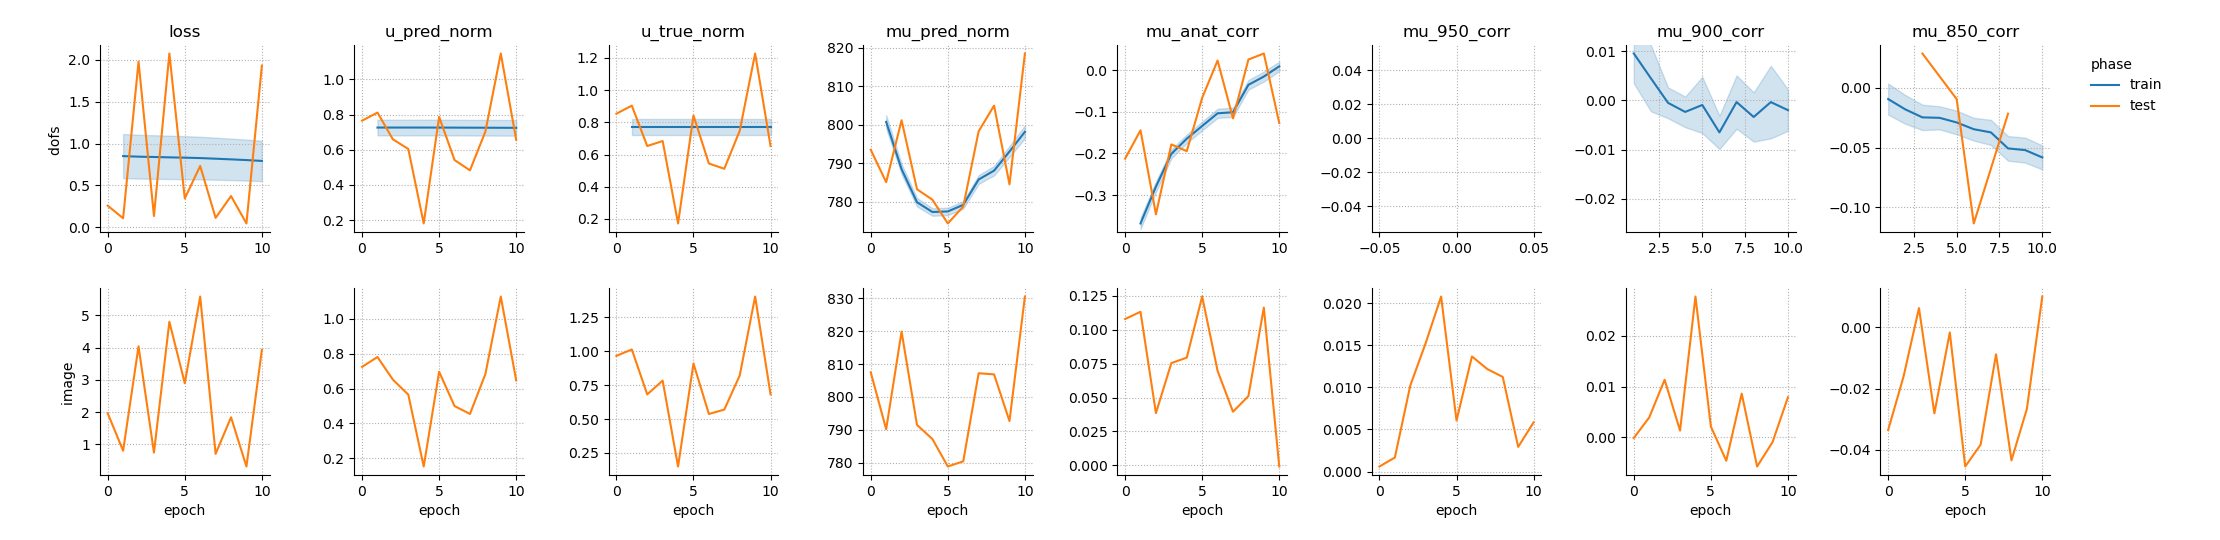

anat


<IPython.core.display.Javascript object>


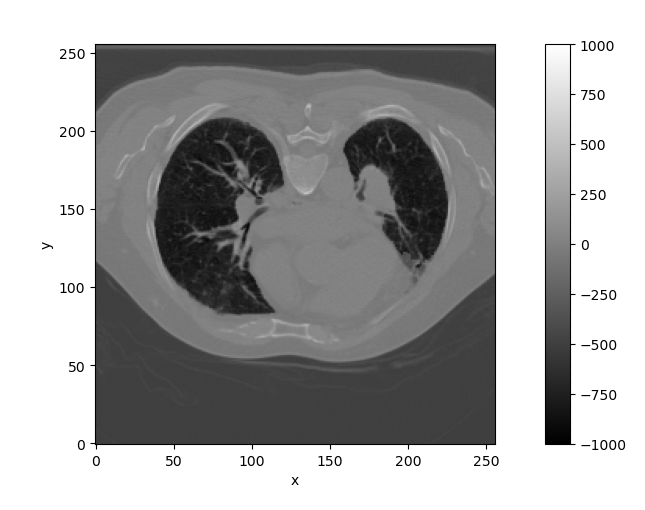

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

emph


<IPython.core.display.Javascript object>


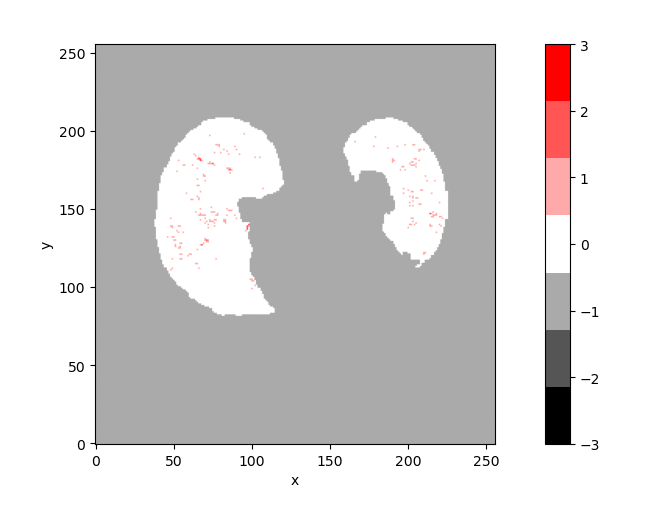

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

mu_pred


<IPython.core.display.Javascript object>


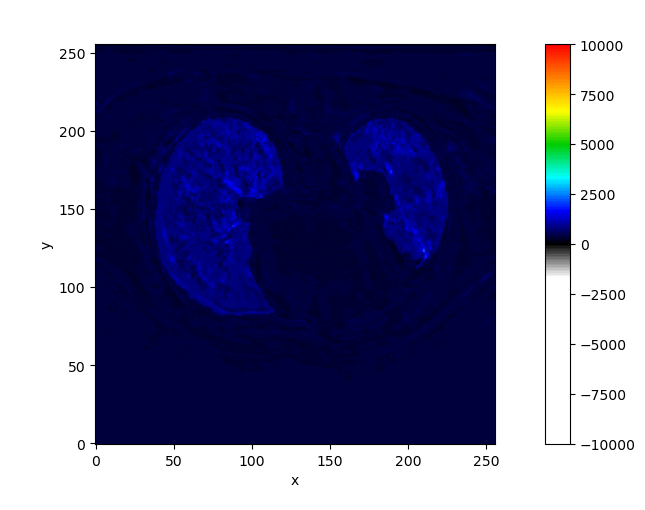

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_pred


<IPython.core.display.Javascript object>


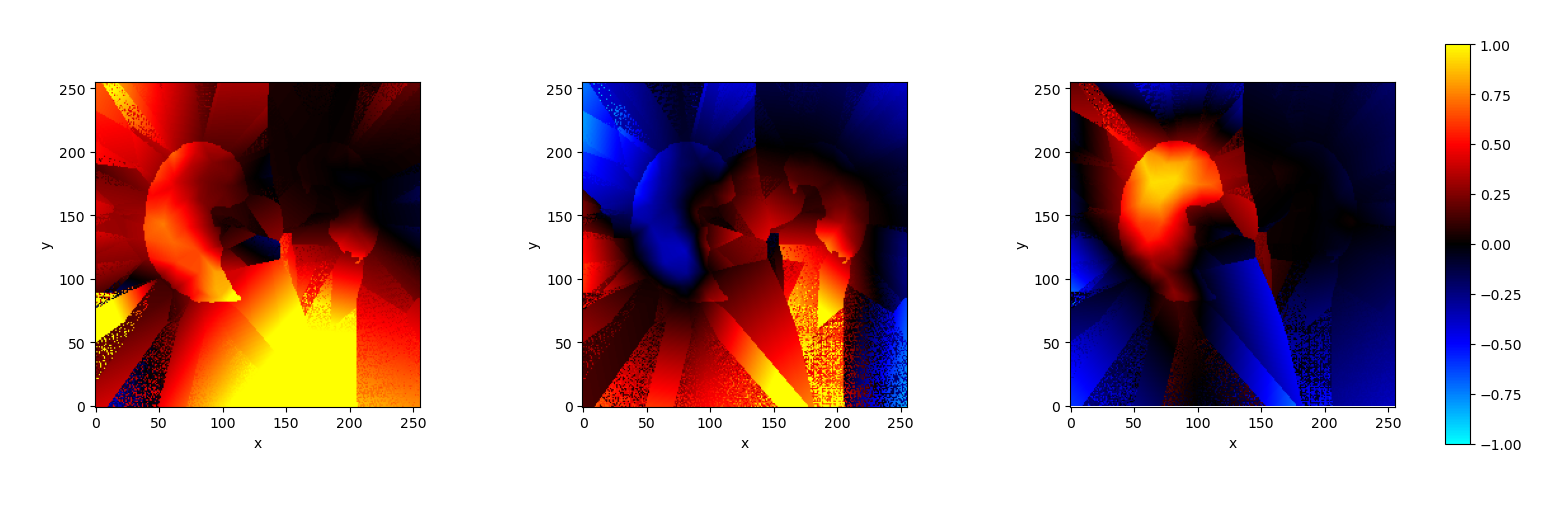

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

u_true


<IPython.core.display.Javascript object>


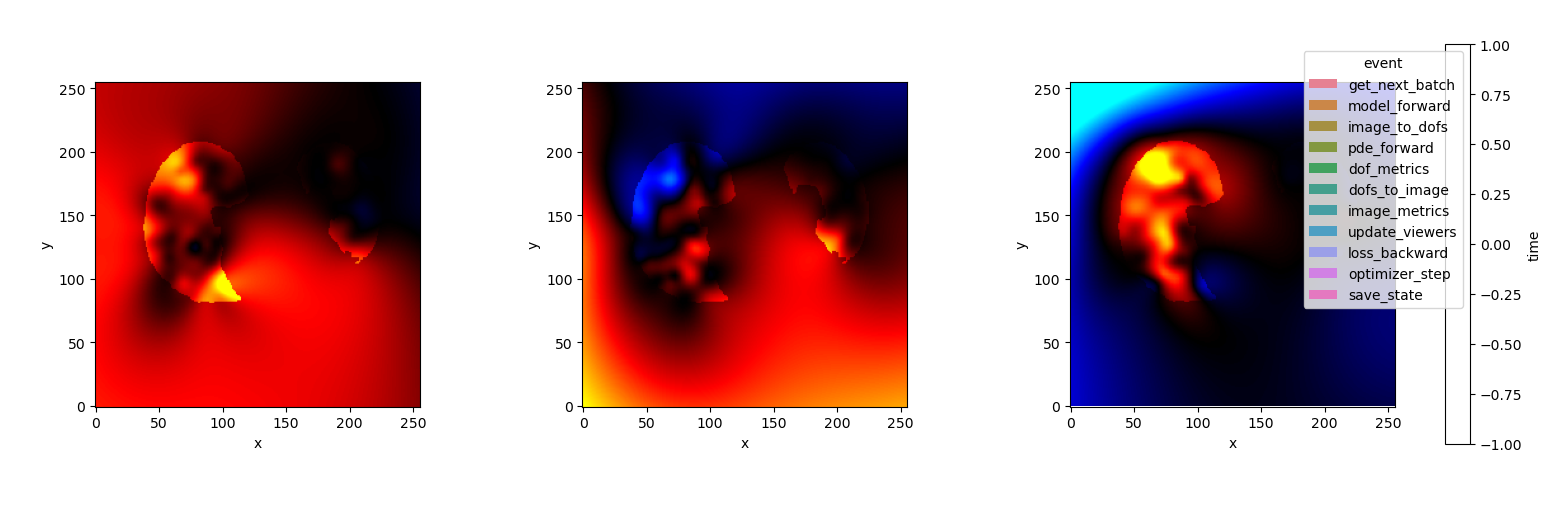

interactive(children=(SelectionSlider(description='z', options=((0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)…

0.2567


In [15]:
# test forward pass and initialize viewers
trainer.timer.start()
trainer.run_next_batch(phase='test', epoch=0)

In [16]:
trainer.save_metrics()
trainer.save_viewers()
trainer.save_state()

In [18]:
%%time
trainer.timer.start()
trainer.train(num_epochs=10)

Training...
Epoch 1/10
Running train phase
Loading ../data/Emory-4DCT/Case4Pack/NIFTI/case4_T10.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/CorrField/case4_T20_T10.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T10/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/pygalmesh/case4_T10_20.xdmf... 392
Loading ../data/Emory-4DCT/Case7Pack/NIFTI/case7_T80.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case7Pack/CorrField/case7_T90_T80.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case7Pack/TotalSegment/case7_T80/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case7Pack/pygalmesh/case7_T80_20.xdmf... 485
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T50.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T60_T50.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T50/lung_combined_mask.nii.gz... (256, 256, 94)


Loading ../data/Emory-4DCT/Case3Pack/NIFTI/case3_T10.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/CorrField/case3_T20_T10.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T10/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/pygalmesh/case3_T10_20.xdmf... 529
['case7_T10.nii', 'case5_T10.nii', 'case1_T70.nii', 'case3_T10.nii']....0.2595
Loading ../data/Emory-4DCT/Case4Pack/NIFTI/case4_T70.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/CorrField/case4_T80_T70.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T70/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/pygalmesh/case4_T70_20.xdmf... 344
Loading ../data/Emory-4DCT/Case10Pack/NIFTI/case10_T50.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case10Pack/CorrField/case10_T60_T50.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case10Pack/TotalSegment/case10_T50/lu

Loading ../data/Emory-4DCT/Case8Deploy/pygalmesh/case8_T60_20.xdmf... 607
Loading ../data/Emory-4DCT/Case6Pack/NIFTI/case6_T20.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/CorrField/case6_T30_T20.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case6Pack/TotalSegment/case6_T20/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case6Pack/pygalmesh/case6_T20_20.xdmf... 214
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T20.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T30_T20.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T20/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T20_20.xdmf... 654
['case3_T30.nii', 'case8_T60.nii', 'case6_T20.nii', 'case2_T20.nii']....0.9782
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T70.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/CorrField/case2_T80_T70.nii.gz... (256, 256, 9

Loading ../data/Emory-4DCT/Case3Pack/CorrField/case3_T50_T40.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T40/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case3Pack/pygalmesh/case3_T40_20.xdmf... 480
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T60.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/CorrField/case1_T70_T60.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case1Pack/TotalSegment/case1_T60/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case1Pack/pygalmesh/case1_T60_20.xdmf... 314
Loading ../data/Emory-4DCT/Case8Deploy/NIFTI/case8_T80.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/CorrField/case8_T90_T80.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T80/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case8Deploy/pygalmesh/case8_T80_20.xdmf... 659
Loading ../data/Emory-4DCT/Case1Pack/NIFT

Loading ../data/Emory-4DCT/Case2Pack/TotalSegment/case2_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case2Pack/pygalmesh/case2_T00_20.xdmf... 682
['case2_T00.nii'].0.1063
Epoch 2/10
Running train phase
['case4_T60.nii', 'case8_T80.nii', 'case6_T70.nii', 'case10_T10.nii']....0.7670
['case2_T90.nii', 'case5_T30.nii', 'case6_T10.nii', 'case6_T30.nii']....0.7876
['case3_T30.nii', 'case9_T20.nii', 'case4_T20.nii', 'case3_T10.nii']....0.1938
['case3_T60.nii', 'case3_T20.nii', 'case7_T10.nii', 'case4_T90.nii']....0.1916
['case1_T50.nii', 'case7_T80.nii', 'case1_T30.nii', 'case1_T10.nii']....5.8909
['case2_T80.nii', 'case9_T10.nii', 'case5_T40.nii', 'case6_T60.nii']....0.7945
['case9_T40.nii', 'case10_T20.nii', 'case2_T70.nii', 'case3_T90.nii']....0.4764
['case10_T70.nii', 'case10_T30.nii', 'case6_T80.nii', 'case9_T70.nii']....0.1340
['case7_T50.nii', 'case5_T60.nii', 'case2_T60.nii', 'case4_T70.nii']....0.4080
['case7_T70.nii', 'case1_T60.nii', 'case7_T30.nii', '

['case4_T70.nii', 'case1_T80.nii', 'case5_T20.nii', 'case2_T40.nii']....0.5042
['case6_T10.nii', 'case4_T10.nii', 'case6_T70.nii', 'case3_T10.nii']....0.2959
['case4_T80.nii', 'case7_T60.nii', 'case1_T10.nii', 'case9_T20.nii']....0.3567
['case1_T40.nii', 'case10_T80.nii', 'case2_T30.nii', 'case7_T90.nii']....0.8938
['case5_T80.nii', 'case5_T40.nii', 'case3_T90.nii', 'case10_T90.nii']....0.6082
['case5_T10.nii', 'case8_T60.nii']..0.2740
Loading ../data/Emory-4DCT/Case5Pack/NIFTI/case5_T00.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case5Pack/CorrField/case5_T10_T00.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case5Pack/TotalSegment/case5_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case5Pack/pygalmesh/case5_T00_20.xdmf... 464
['case5_T00.nii'].0.3426
Epoch 6/10
Running train phase
['case1_T10.nii', 'case3_T80.nii', 'case4_T50.nii', 'case7_T70.nii']....0.5735
['case6_T10.nii', 'case6_T90.nii', 'case9_T80.nii', 'case2_T20.nii']....0.9082
['c

['case2_T80.nii', 'case1_T40.nii', 'case10_T10.nii', 'case4_T80.nii']....0.8318
['case4_T50.nii', 'case1_T50.nii', 'case7_T20.nii', 'case10_T50.nii']....2.0581
['case3_T30.nii', 'case1_T20.nii', 'case7_T40.nii', 'case4_T40.nii']....0.2716
['case2_T90.nii', 'case1_T80.nii', 'case1_T10.nii', 'case2_T30.nii']....1.1911
['case5_T70.nii', 'case5_T40.nii']..0.5634
Loading ../data/Emory-4DCT/Case4Pack/NIFTI/case4_T00.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/CorrField/case4_T10_T00.nii.gz... (256, 256, 94, 3)
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T00/lung_combined_mask.nii.gz... (256, 256, 94)
Loading ../data/Emory-4DCT/Case4Pack/pygalmesh/case4_T00_20.xdmf... 387
['case4_T00.nii'].0.0438
Epoch 10/10
Running train phase
['case9_T90.nii', 'case5_T30.nii', 'case3_T10.nii', 'case3_T80.nii']....0.5322
['case2_T50.nii', 'case10_T70.nii', 'case9_T80.nii', 'case8_T40.nii']....0.5891
['case5_T70.nii', 'case3_T60.nii', 'case4_T10.nii', 'case8_T20.nii']....0.1681
[

In [19]:
trainer.evaluator.metrics

loss u_pred_norm u_true_norm  \
epoch batch example        phase rep                                       
0     1     case3_T00.nii  test  dofs   0.256742    0.765013    0.853728   
                                 image  1.964829    0.724279    0.965698   
1     1     case4_T10.nii  train dofs   0.118907    1.157694    1.264936   
            case7_T80.nii  train dofs    0.26817    0.784922     0.83889   
            case2_T50.nii  train dofs   1.884021    0.217131    0.241482   
...                                          ...         ...         ...   
10    22    case4_T80.nii  train dofs   0.047458    1.387132     1.50179   
      23    case7_T60.nii  train dofs   0.168017    0.809623    0.926396   
            case10_T30.nii train dofs   0.091439    0.668682     0.72086   
      1     case6_T00.nii  test  dofs   1.931852    0.656339    0.652784   
                                 image  3.928363    0.646751    0.681661   

                                       mu_pred_norm mu_anat_corr mu_950_corr  \
epoch batch example        phase rep                                           
0     1     case3_T00.nii  test  dofs     793.54293     -0.21257         NaN   
                                 image   807.474548     0.107897    0.000603   
1     1     case4_T10.nii  train dofs    782.930207    -0.549639         NaN   
            case7_T80.nii  train dofs     830.93593    -0.432344         NaN   
            case2_T50.nii  train dofs    797.305496    -0.304139         NaN   
...                                             ...          ...         ...   
10    22    case4_T80.nii  train dofs    780.713214     0.052866         NaN   
      23    case7_T60.nii  train dofs    824.178811    -0.032766         NaN   
            case10_T30.nii train dofs    805.639665     0.077254         NaN   
      1     case6_T00.nii  test  dofs    818.547743    -0.126878         NaN   
                                 image   830.541931    -0.000885    0.005847   

                                       mu_900_corr mu_850_corr  
epoch batch example        phase rep                            
0     1     case3_T00.nii  test  dofs          NaN         NaN  
                                 image   -0.000141   -0.033557  
1     1     case4_T10.nii  train dofs          NaN         NaN  
            case7_T80.nii  train dofs          NaN         NaN  
            case2_T50.nii  train dofs          NaN         NaN  
...                                            ...         ...  
10    22    case4_T80.nii  train dofs          NaN         NaN  
      23    case7_T60.nii  train dofs          NaN         NaN  
            case10_T30.nii train dofs          NaN   -0.035006  
      1     case6_T00.nii  test  dofs          NaN         NaN  
                                 image    0.007889    0.009999  

[922 rows x 8 columns]

In [20]:
trainer.timer.usage

time  gpu_mem_total  \
epoch batch example phase event                                      
0      1    -1      test  get_next_batch   2.518850   5.104127e+10   
                          model_forward   73.509610   5.104127e+10   
             1      test  image_to_dofs    7.825022   5.104127e+10   
                          pde_forward      4.148125   5.104127e+10   
                          dof_metrics      3.638935   5.104127e+10   
...                                             ...            ...   
10     1     1      test  dof_metrics      0.007867   5.104127e+10   
                          dofs_to_image   72.062858   5.104127e+10   
                          image_metrics    0.015082   5.104127e+10   
                          update_viewers   0.920988   5.104127e+10   
      -1    -1      test  save_state       0.823621   5.104127e+10   

                                          gpu_mem_reserved  gpu_mem_allocated  \
epoch batch example phase event                                                 
0      1    -1      test  get_next_batch      9.080668e+08       8.657219e+08   
                          model_forward       3.445621e+09       3.192313e+09   
             1      test  image_to_dofs       4.196401e+09       4.180918e+09   
                          pde_forward         4.196401e+09       4.180918e+09   
                          dof_metrics         4.196401e+09       4.180918e+09   
...                                                    ...                ...   
10     1     1      test  dof_metrics         2.897635e+10       1.568446e+10   
                          dofs_to_image       2.897635e+10       1.583231e+10   
                          image_metrics       2.897635e+10       1.583231e+10   
                          update_viewers      2.897635e+10       1.588160e+10   
      -1    -1      test  save_state          2.897635e+10       1.258600e+10   

                                             mem_total      mem_used  
epoch batch example phase event                                       
0      1    -1      test  get_next_batch  5.408801e+11  8.998298e+08  
                          model_forward   5.408801e+11  9.423421e+08  
             1      test  image_to_dofs   5.408801e+11  9.854525e+08  
                          pde_forward     5.408801e+11  9.902776e+08  
                          dof_metrics     5.408801e+11  9.915556e+08  
...                                                ...           ...  
10     1     1      test  dof_metrics     5.408801e+11  2.044350e+09  
                          dofs_to_image   5.408801e+11  2.044350e+09  
                          image_metrics   5.408801e+11  2.044350e+09  
                          update_viewers  5.408801e+11  1.970426e+09  
      -1    -1      test  save_state      5.408801e+11  1.970426e+09  

[3718 rows x 6 columns]

In [27]:
trainer.timer.usage.groupby(['phase', 'event']).mean().sort_values('time')

time  gpu_mem_total  gpu_mem_reserved  \
phase event                                                        
train dof_metrics      0.007893   5.104127e+10      2.688101e+10   
      optimizer_step   0.012358   5.104127e+10      2.696110e+10   
      pde_forward      0.028091   5.104127e+10      2.688101e+10   
      model_forward    0.125280   5.104127e+10      2.689239e+10   
test  image_metrics    0.278532   5.104127e+10      2.541939e+10   
      dof_metrics      0.337900   5.104127e+10      2.536963e+10   
      pde_forward      0.403954   5.104127e+10      2.536963e+10   
train image_to_dofs    0.455910   5.104127e+10      2.688101e+10   
      get_next_batch   0.817940   5.104127e+10      2.685575e+10   
test  save_state       0.901944   5.104127e+10      2.748695e+10   
      image_to_dofs    1.138822   5.104127e+10      2.536963e+10   
      update_viewers   1.250105   5.104127e+10      2.541939e+10   
train loss_backward    1.436959   5.104127e+10      2.696110e+10   
test  get_next_batch   1.438970   5.104127e+10      2.507069e+10   
      model_forward    6.715294   5.104127e+10      2.530138e+10   
      dofs_to_image   72.420645   5.104127e+10      2.538317e+10   

                      gpu_mem_allocated     mem_total      mem_used  
phase event                                                          
train dof_metrics          2.333078e+10  5.408801e+11  1.899982e+09  
      optimizer_step       1.225170e+10  5.408801e+11  1.900767e+09  
      pde_forward          2.333078e+10  5.408801e+11  1.899981e+09  
      model_forward        2.125494e+10  5.408801e+11  1.899943e+09  
test  image_metrics        1.459378e+10  5.408801e+11  1.839314e+09  
      dof_metrics          1.444506e+10  5.408801e+11  1.831071e+09  
      pde_forward          1.444506e+10  5.408801e+11  1.830955e+09  
train image_to_dofs        2.333078e+10  5.408801e+11  1.899978e+09  
      get_next_batch       1.215635e+10  5.408801e+11  1.899929e+09  
test  save_state           1.227798e+10  5.408801e+11  1.928190e+09  
      image_to_dofs        1.444506e+10  5.408801e+11  1.830516e+09  
      update_viewers       1.464316e+10  5.408801e+11  1.881762e+09  
train loss_backward        1.225180e+10  5.408801e+11  1.900749e+09  
test  get_next_batch       1.124050e+10  5.408801e+11  1.822732e+09  
      model_forward        1.356750e+10  5.408801e+11  1.826597e+09  
      dofs_to_image        1.459301e+10  5.408801e+11  1.833994e+09

<IPython.core.display.Javascript object>


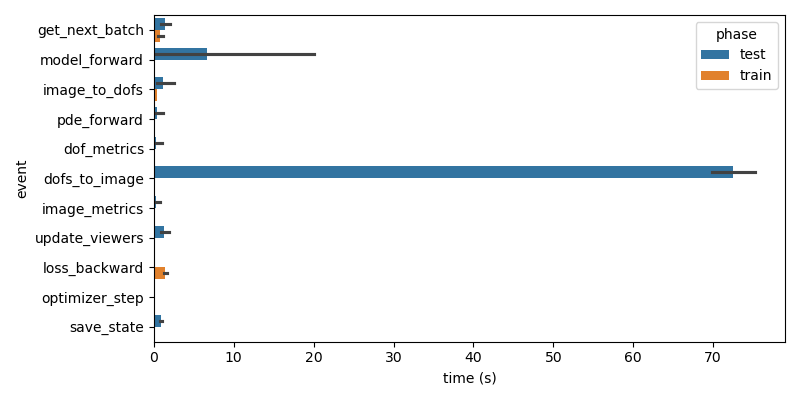

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage, y='event', x='time', hue='phase', estimator='mean', ax=ax)
ax.set_xlabel('time (s)')
fig.tight_layout()

<IPython.core.display.Javascript object>


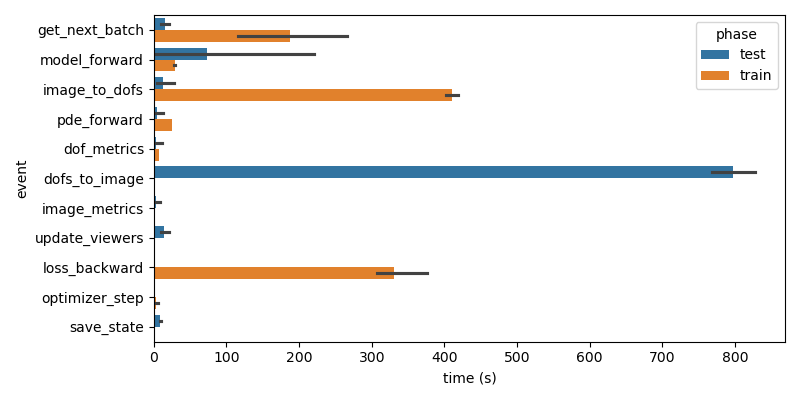

In [60]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(trainer.timer.usage , y='event', x='time', hue='phase', estimator='sum', ax=ax)
#ax.set_xscale('log')
ax.set_xlabel('time (s)')
fig.tight_layout()

<IPython.core.display.Javascript object>


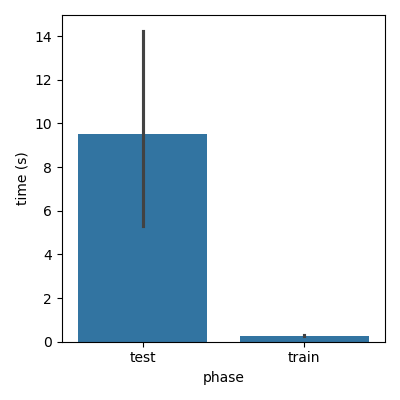

In [58]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='mean', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()

<IPython.core.display.Javascript object>


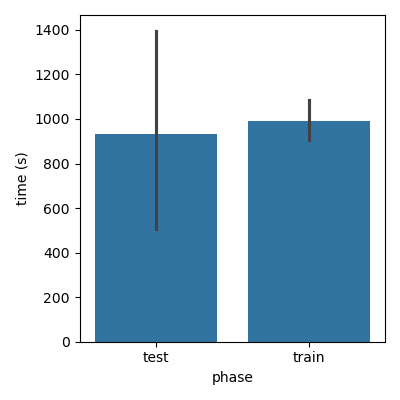

In [59]:
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(trainer.timer.usage, y='time', x='phase', estimator='sum', ax=ax)
ax.set_ylabel('time (s)')
fig.tight_layout()